In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Informations about Dataset**

In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Checking for null values**

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Drop Unnecessary Columns**

In [5]:
drop_list=["id","date"]
df.drop(drop_list, axis=1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Count plot of the unique values in each columns**

<AxesSubplot:>

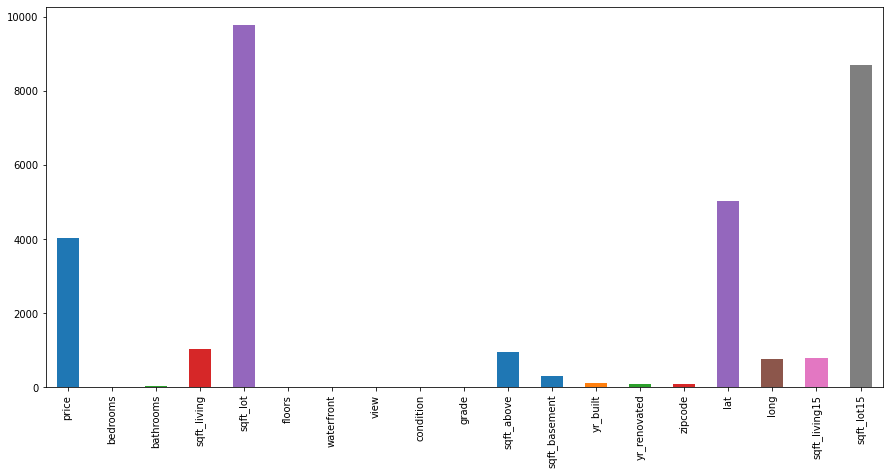

In [6]:
df.nunique().plot(kind = 'bar', figsize = (15,7))

**Countplot of each categorical column unique values** 

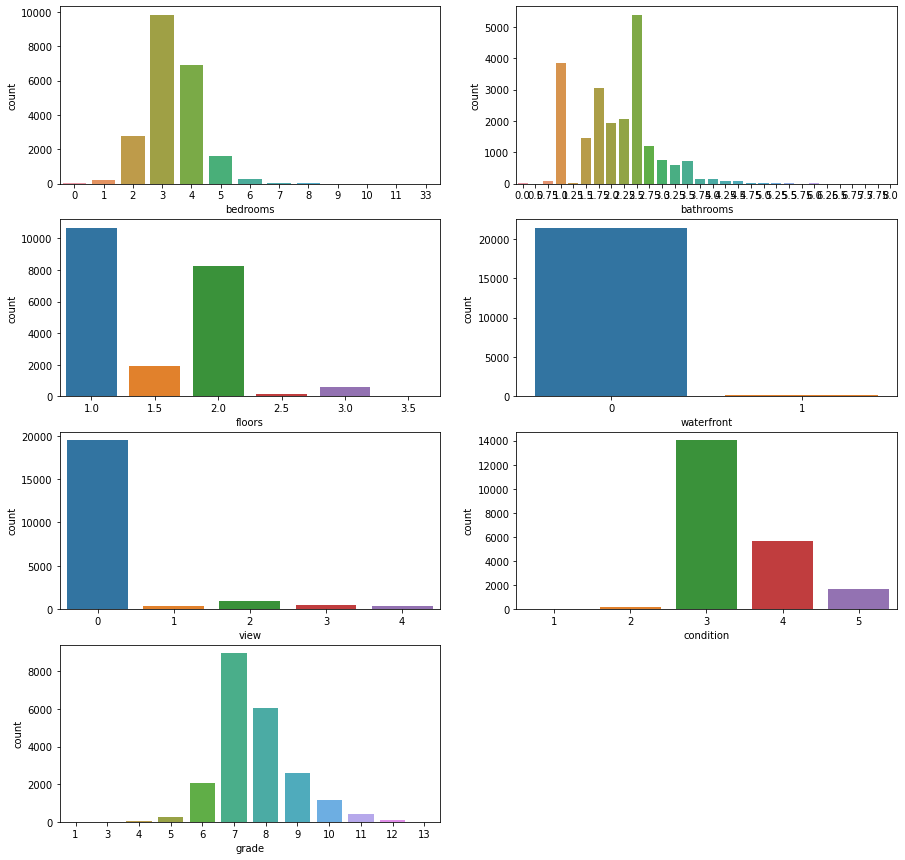

In [7]:
plt.figure(figsize = (15,15))
for n, col in enumerate(['bedrooms','bathrooms','floors','waterfront','view','condition','grade']):
    plt.subplot(4,2,n + 1)
    ax = sns.countplot(x=col, data=df)
    ax.set_xticklabels(ax.get_xticklabels());

**Target column vs each categorical column count plot**

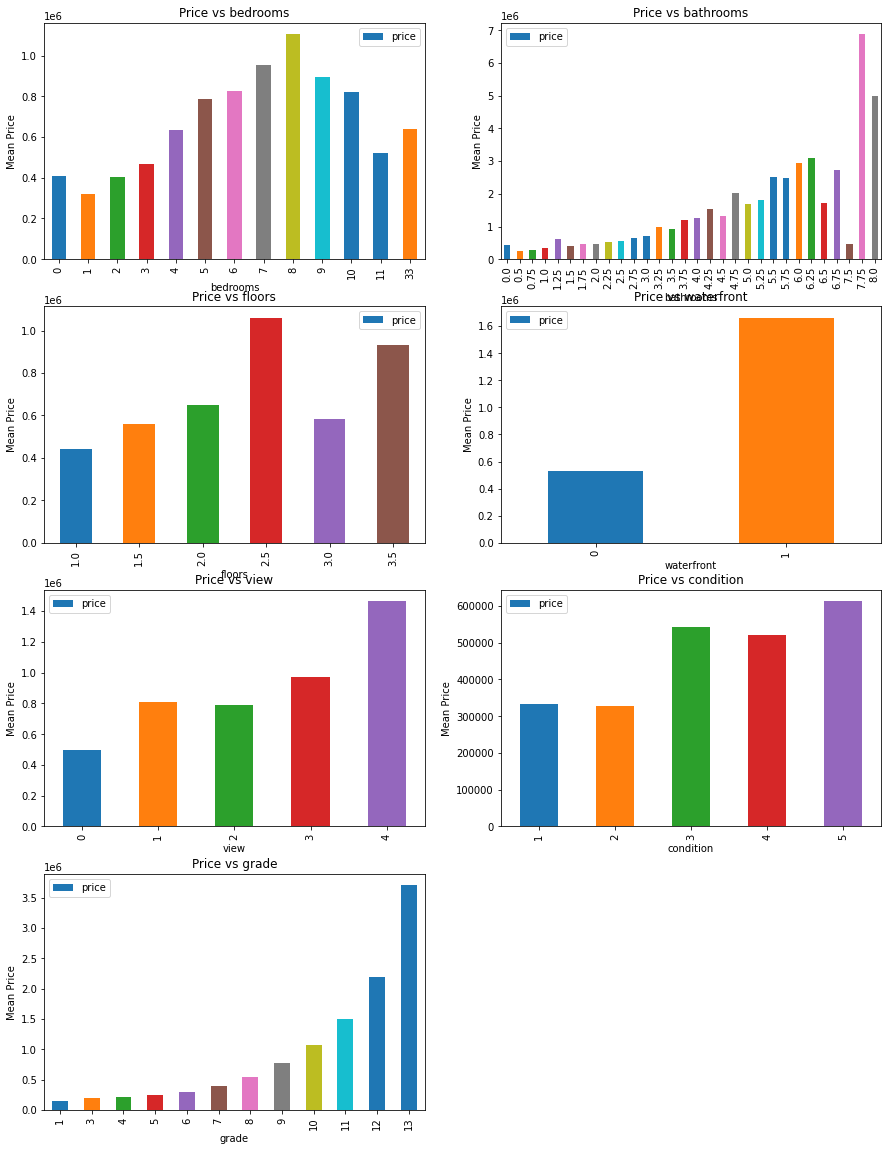

In [8]:
plt.figure(figsize = (15,20))
for n, col in enumerate(['bedrooms','bathrooms','floors','waterfront','view','condition','grade']):
    plt.subplot(4,2,n + 1)
    df.groupby(col).price.mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel("Mean Price")
    plt.title("Price vs "+ col)
    plt.legend()

**Box plot of each categorical columns** 

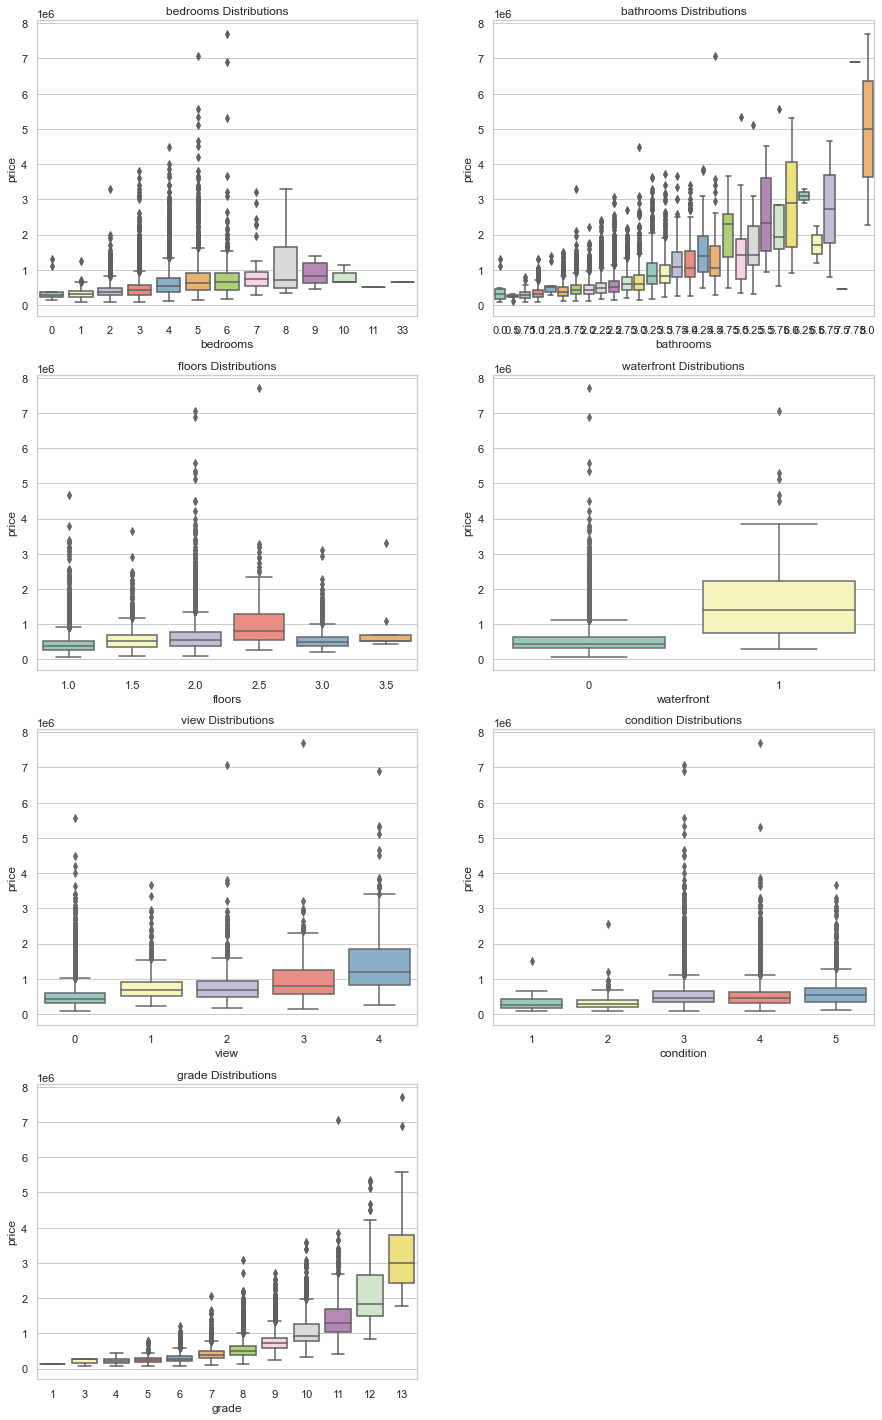

In [14]:
plt.figure(figsize=(15,25))
sns.set_theme(style="whitegrid")
for n, col in enumerate(['bedrooms','bathrooms','floors','waterfront','view','condition','grade']):
    plt.subplot(4,2,n + 1)
    sns.boxplot(x = col, y="price", data=df, palette="Set3")
    plt.title(col + " Distributions")

**Correlation of all the columns**

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

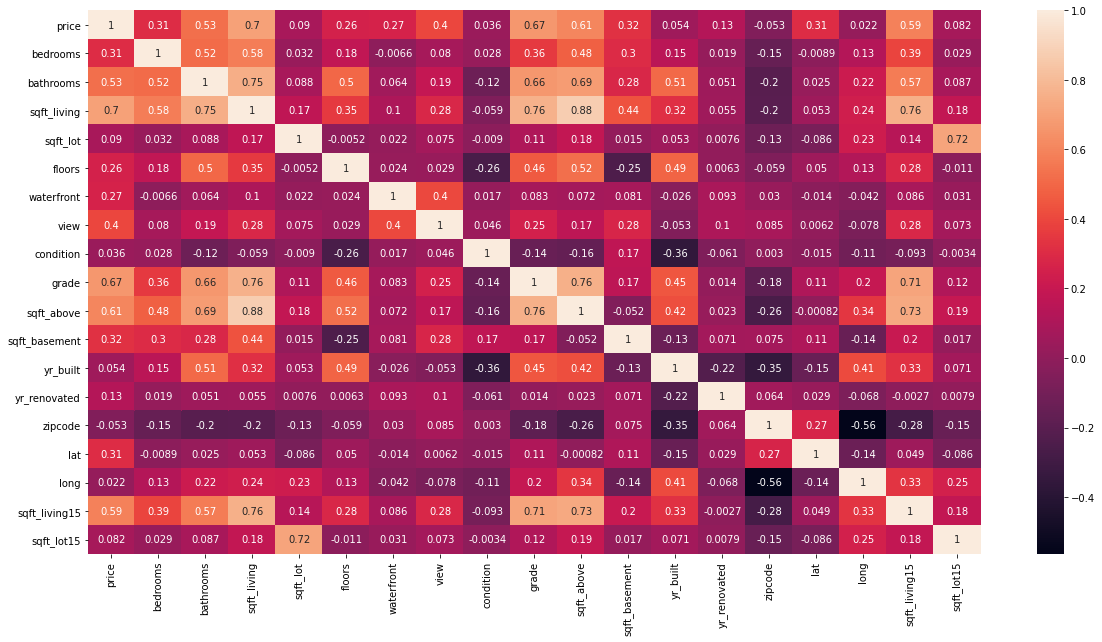

In [9]:
corr=df.corr()
display(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

**Seperating the target and the features columns**

In [10]:
features = df.iloc[:, 1:] # contains all the feature of dataset
label = df.iloc[:,0] # contains target values

**Spliting the training and testing Dataset into 70 by 30 ratio**

In [11]:
# 30% used for testing and remaining 70% used for training 
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.30, random_state=11)
print('Shape of training data :',X_train.shape) 
print('Shape of testing data :',X_test.shape)

Shape of training data : (15129, 18)
Shape of testing data : (6484, 18)


**Creating the DNN regressor model**

In [12]:
model = Sequential()
model.add(Dense(500, input_dim=18, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.summary()

**Train over 100 epochs**

In [14]:
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data = (X_test, y_test))

Epoch 1/100
473/473 [==============================] - 2s 3ms/step - loss: 132703895552.0000 - mean_squared_error: 132703895552.0000 - val_loss: 72236048384.0000 - val_mean_squared_error: 72236048384.0000
Epoch 2/100
473/473 [==============================] - 1s 2ms/step - loss: 65309257728.0000 - mean_squared_error: 65309257728.0000 - val_loss: 56151105536.0000 - val_mean_squared_error: 56151105536.0000
Epoch 3/100
473/473 [==============================] - 1s 2ms/step - loss: 60502216704.0000 - mean_squared_error: 60502216704.0000 - val_loss: 56754143232.0000 - val_mean_squared_error: 56754143232.0000
Epoch 4/100
473/473 [==============================] - 1s 2ms/step - loss: 60046553088.0000 - mean_squared_error: 60046553088.0000 - val_loss: 54065651712.0000 - val_mean_squared_error: 54065651712.0000
Epoch 5/100
473/473 [==============================] - 1s 2ms/step - loss: 58328522752.0000 - mean_squared_error: 58328522752.0000 - val_loss: 52317687808.0000 - val_mean_squared_error: 

**Model Performance Graphs**

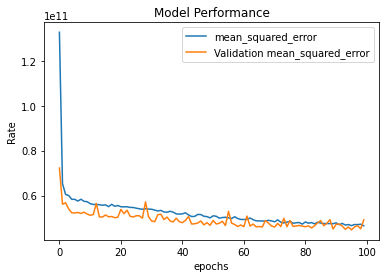

In [15]:
# Model Performance graph
plt.plot(range(epochs), history.history['mean_squared_error'], label = "mean_squared_error")
plt.plot(range(epochs), history.history['val_mean_squared_error'], label = "Validation mean_squared_error")
plt.title("Model Performance")
plt.xlabel("epochs")
plt.ylabel("Rate")
plt.legend()
plt.show()

**Predicting the model values over the test data**

In [16]:
y_pred = model.predict(X_test)
print("Actual values:", X_test[:10])
print("Prediction values:", y_pred[:10])

**Model Evaluations**

In [17]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

R2 Score: 0.6047129539722012
Mean Absolute Error 141060.86352945713
Mean Squared Error 49211260971.98883
